# Stress detection for IT professionals

# **Importing Necessary Packages and Loading The Dataset**

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
#Let's Load the data using panda library
df = pd.read_csv(r'stress_detection_IT_professionals_dataset.csv')

In [5]:
#Let's print the first 5 records of the data
df.head()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,87,5.56,5,28,31,6
1,74,5.89,5,25,42,3
2,79,4.58,9,26,28,4
3,92,5.10,7,30,37,3
4,88,5.23,8,29,35,6


In [7]:
#Let's print the last 5 records of the data
df.tail()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
995,74,5.10,13,26,36,1
996,68,6.40,7,24,31,5
997,70,5.16,8,23,27,3
998,58,3.86,6,21,34,6
999,66,3.69,8,22,36,1


In [9]:
#Printing the shape of the dataset
df.shape

(1000, 6)

In [11]:
#Getting the data types of all the columns
df.dtypes

Heart_Rate             int64
Skin_Conductivity    float64
Hours_Worked           int64
Stress_Level           int64
Emails_Sent            int64
Meetings_Attended      int64
dtype: object

In [13]:
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**Here in our dataset we have both object and float data types.**

In [15]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Heart_Rate         1000 non-null   int64  
 1   Skin_Conductivity  1000 non-null   float64
 2   Hours_Worked       1000 non-null   int64  
 3   Stress_Level       1000 non-null   int64  
 4   Emails_Sent        1000 non-null   int64  
 5   Meetings_Attended  1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


In [17]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


Heart_Rate            56
Skin_Conductivity    368
Hours_Worked          13
Stress_Level          16
Emails_Sent           37
Meetings_Attended     10
dtype: int64

In [19]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,mean,std,min,25%,50%,75%,max
Heart_Rate,1000.0,69.03700,9.870717,39.00,62.7500,69.00,76.00,97.00
Skin_Conductivity,1000.0,5.01366,0.968644,2.01,4.3475,5.03,5.63,8.17
Hours_Worked,1000.0,8.38600,1.932547,2.00,7.0000,8.00,10.00,14.00
Stress_Level,1000.0,23.35400,2.595654,16.00,22.0000,23.00,25.00,31.00
Emails_Sent,1000.0,29.79200,5.580850,13.00,26.0000,30.00,33.00,49.00
Meetings_Attended,1000.0,2.95900,1.720546,0.00,2.0000,3.00,4.00,9.00


**The above table shows the statistical information about the each and every column of our data set.**

In [21]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

0

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [ ]:
#Let's check the null values present in the data set
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

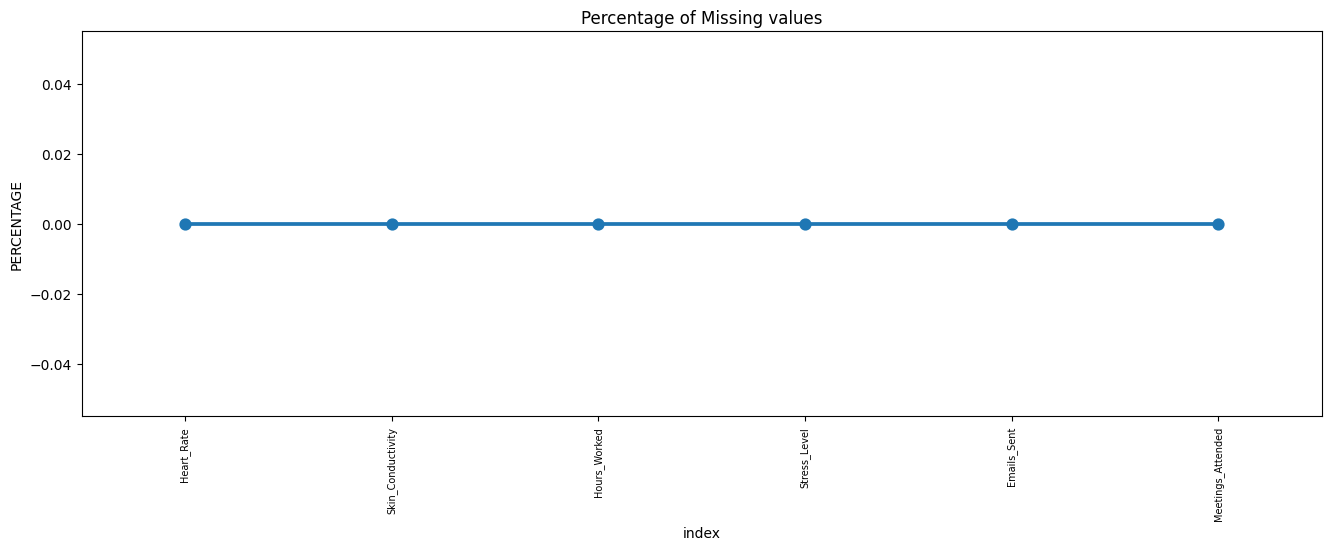

In [ ]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [29]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['Heart_Rate', 'Skin_Conductivity', 'Hours_Worked', 'Stress_Level',
       'Emails_Sent', 'Meetings_Attended'],
      dtype='object')

<Axes: xlabel='Stress_Level', ylabel='count'>

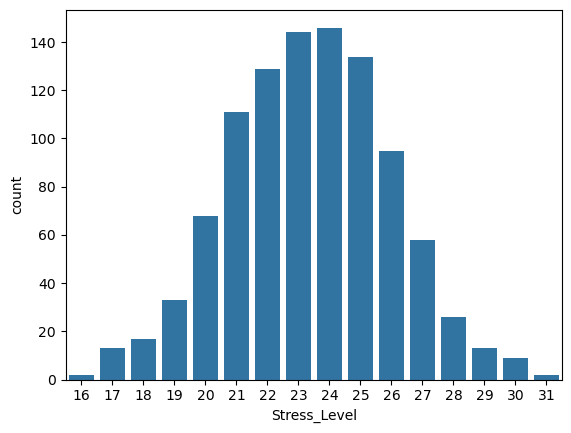

In [31]:
#let's see loan_amnt by using countplot
sns.countplot(x=df.Stress_Level)

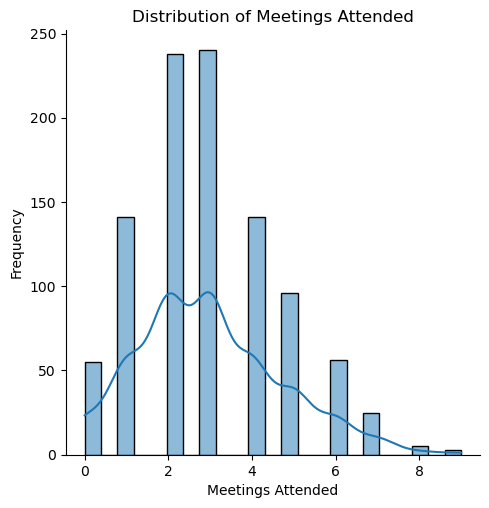

In [37]:
import seaborn as sns

# Example DataFrame
# df = ...

# Create the displot
sns.displot(df['Meetings_Attended'], kde=True)  # Add kde=True for a kernel density estimate
plt.title('Distribution of Meetings Attended')
plt.xlabel('Meetings Attended')
plt.ylabel('Frequency')
plt.show()


<Figure size 1700x100 with 0 Axes>

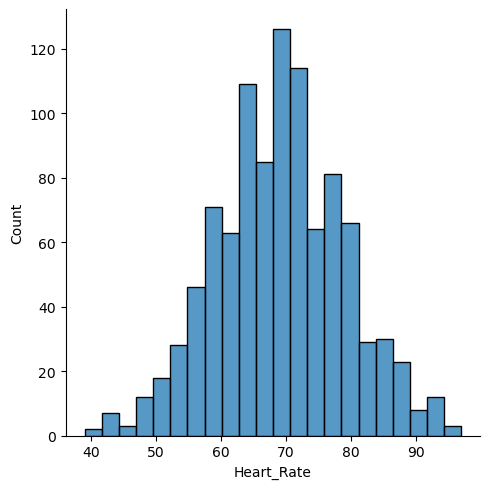

<Figure size 1700x100 with 0 Axes>

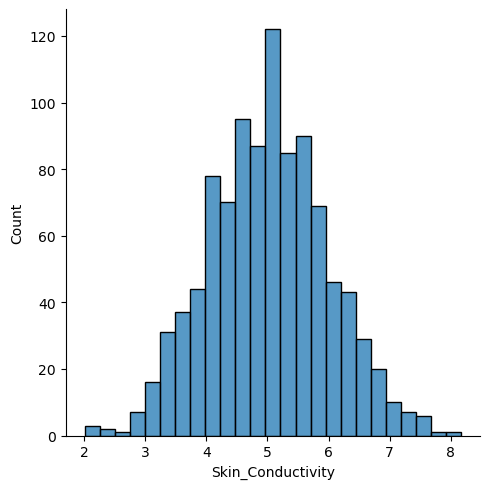

<Figure size 1700x100 with 0 Axes>

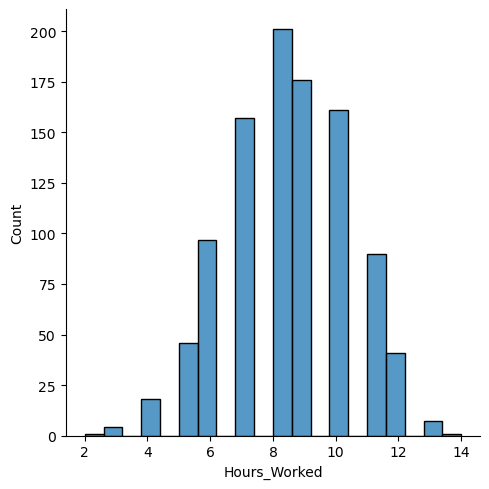

<Figure size 1700x100 with 0 Axes>

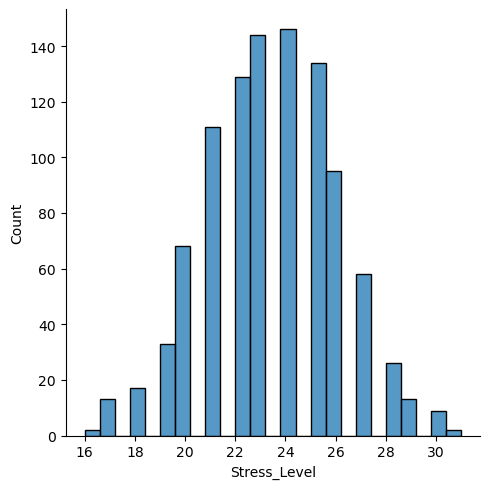

<Figure size 1700x100 with 0 Axes>

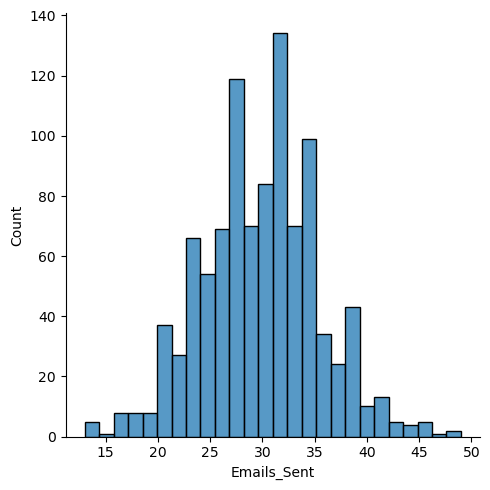

<Figure size 1700x100 with 0 Axes>

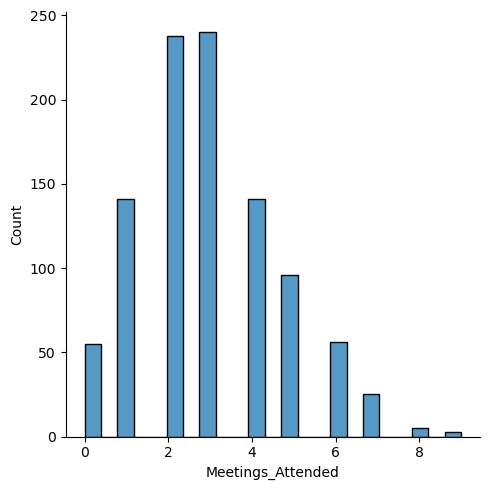

In [41]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

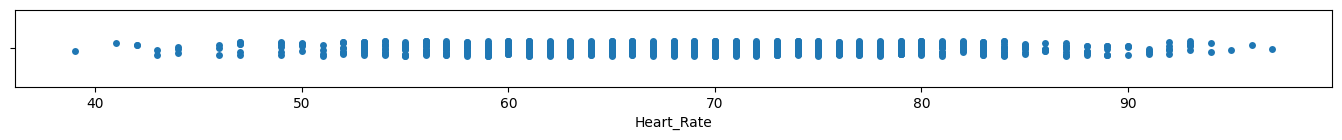

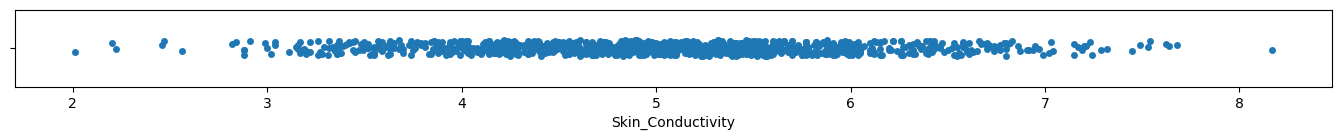

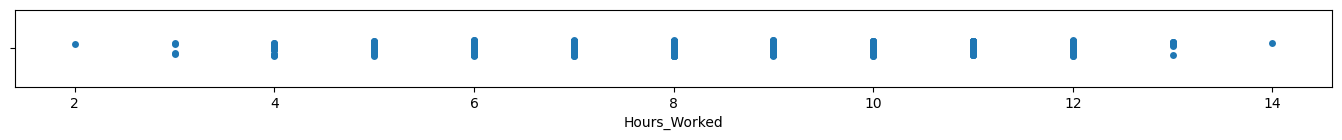

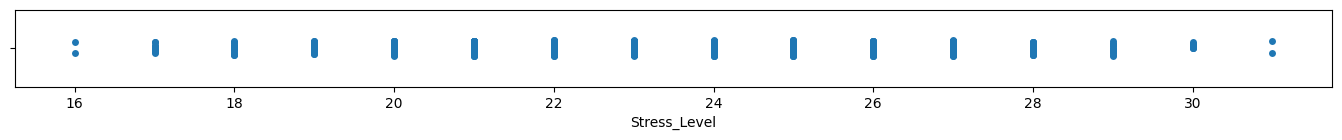

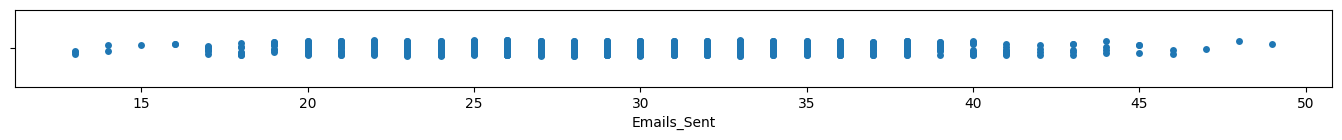

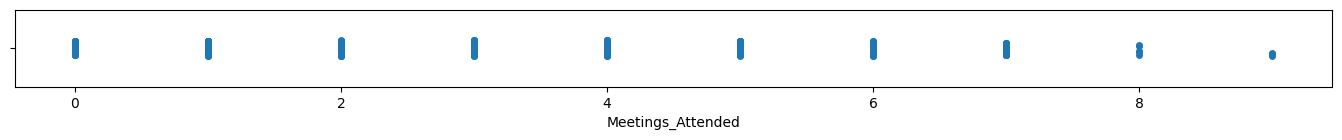

In [ ]:
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

array([[<Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'Skin_Conductivity'}>],
       [<Axes: title={'center': 'Hours_Worked'}>,
        <Axes: title={'center': 'Stress_Level'}>],
       [<Axes: title={'center': 'Emails_Sent'}>,
        <Axes: title={'center': 'Meetings_Attended'}>]], dtype=object)

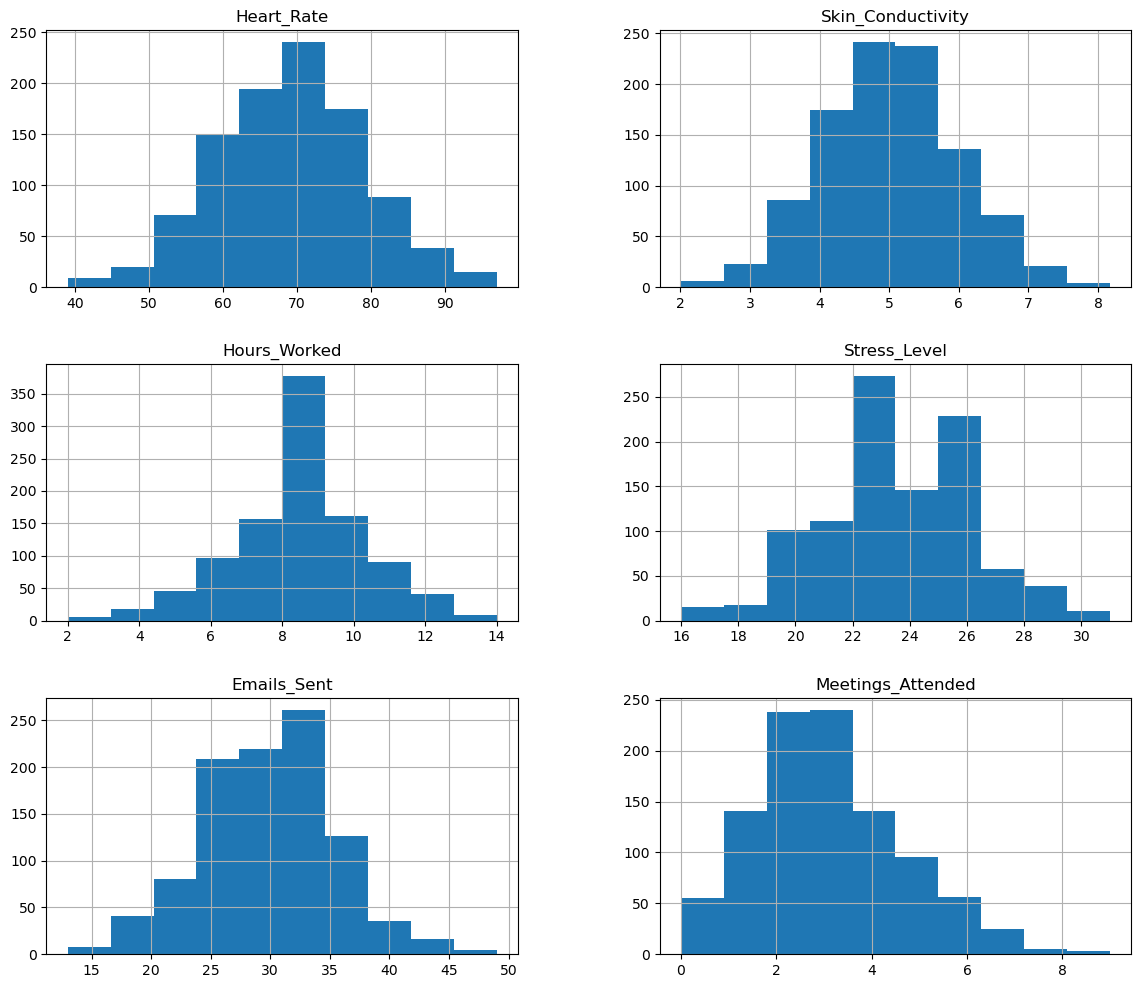

In [43]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column